In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = df['churn']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
X_train.shape

(8000, 13)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Input


model = Sequential([
Input(shape=(X_train.shape[1],)),
Dense(100, activation="relu"),
Dense(1, activation="sigmoid")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5231 - val_loss: 0.4565
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.4604 - val_loss: 0.4432
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.4384 - val_loss: 0.4356
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.4341 - val_loss: 0.4263
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4122 - val_loss: 0.4235
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.4211 - val_loss: 0.4162
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.3965 - val_loss: 0.4070
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.3951 - val_loss: 0.3977
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.3983 - val_loss: 0.3960
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.3826 - val_loss: 0.3857
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.3560 - val_loss: 0.3785
Epoch 12/100
200/200 

In [6]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.490701,0.456544
1,0.455883,0.443189
2,0.440347,0.435611
3,0.428260,0.426260
4,0.418106,0.423510
...,...,...
95,0.318641,0.345998
96,0.318833,0.356833
97,0.319614,0.347545
98,0.318738,0.346660


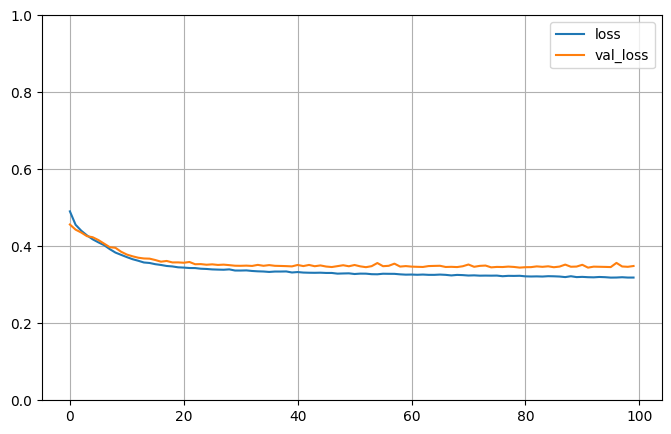

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
y_pred = model.predict(X_test)
y_pred.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step


(2000, 1)

In [10]:
y_pred = model.predict(X_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
[[1494   91]
 [ 198  217]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1585
           1       0.70      0.52      0.60       415

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [27]:
y_pred[0]

array([0.], dtype=float32)